In [65]:
# Imports
import numpy as np
import pandas as pd
from collections import Counter, defaultdict

#visual
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as mno
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from scipy.stats import uniform, randint


In [66]:
#learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, precision_score, accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from sklearn import metrics


In [67]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Data

In [68]:
# Naming the columns
names = ['account_status', 'duration', 'credit_history',
             'purpose', 'credit_amount', 'savings_account', 'employment_since',
             'installment_rate', 'personal_status_sex', 'guarantors', 
             'residence_since', 'property', 'age', 'other_installment_plans',
             'housing', 'number_of_credits', 'job', 'people_to_maintain',
             'phone', 'foreign_worker', 'creditworthy']

df = pd.read_csv('kredit.dat', header=None, sep="\t", names=names)
df.shape


(1000, 21)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   account_status           1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings_account          1000 non-null   object
 6   employment_since         1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   guarantors               1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [70]:
# Select the Last column - target variable
df.creditworthy.replace([1,2], [1,0], inplace=True)
label = df['creditworthy']
df_new = df.drop(columns=['creditworthy'])
df_new.shape

(1000, 20)

In [71]:
print(f'Number of data points: {df_new.shape[0]}')
print(f'Number of Attributes: {df_new.shape[1]}')
df_new.head(5)

Number of data points: 1000
Number of Attributes: 20


,account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,guarantors,residence_since,property,age,other_installment_plans,housing,number_of_credits,job,people_to_maintain,phone,foreign_worker
0,A14,36,A32,?,2299,A63,?,4,A93,A101,4,A123,39,A143,A152,1,A173,1,A191,?
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,4,A124,61,A143,A153,1,?,1,A191,A201
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,3,A124,38,A141,A153,1,?,2,A191,?
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,3,A121,33,A141,A152,2,A173,1,A191,A201
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,3,A123,34,A143,A152,1,A173,2,A192,A201


In [72]:
#Change the 'phone' and 'foreign_worker' coloum values into numeric one
#Telephone: A191: none; A192: yes, registered under the customers name
#Foreign worker: A201: yes; A202: no

df_new.replace('A201', 1, inplace=True)
df_new.replace('A202', 0, inplace=True)
df_new.replace('A191', 0, inplace=True)
df_new.replace('A192', 1, inplace=True)


# Handle Missing Values

In [73]:
# For more convenient operations for missing values, replace ? with NaN
# As there are too many missing values to remove these points from the dataset
df_new.replace("?", np.nan, inplace=True)


In [74]:
print(f'Number of Missing Values:\n\n{df_new.isnull().sum()}')


Number of Missing Values:

account_status               0
duration                     0
credit_history               0
purpose                    173
credit_amount                0
savings_account              0
employment_since           496
installment_rate             0
personal_status_sex          0
guarantors                   0
residence_since              0
property                     0
age                          0
other_installment_plans      0
housing                      0
number_of_credits            0
job                        232
people_to_maintain           0
phone                        0
foreign_worker             360
dtype: int64


In [75]:
# Imputing categorical features is to replace missing values with the most common class
# purpose missing values replace with 'A43'
# employment_since missing values replace with 'A73'
# job missing values replace with 'A173'
# foreign_worker missing values replace with 'A201'
df_new = df_new.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [76]:
print(f'Number of Missing Values:\n\n{df_new.isnull().sum()}')


Number of Missing Values:

account_status             0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment_since           0
installment_rate           0
personal_status_sex        0
guarantors                 0
residence_since            0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_of_credits          0
job                        0
people_to_maintain         0
phone                      0
foreign_worker             0
dtype: int64


# Visualize data

In [77]:
df['installment_rate'].value_counts(ascending=True)


1    136
3    157
2    231
4    476
Name: installment_rate, dtype: int64

[[<AxesSubplot:title={'center':'duration'}>
  <AxesSubplot:title={'center':'credit_amount'}>
  <AxesSubplot:title={'center':'installment_rate'}>]
 [<AxesSubplot:title={'center':'residence_since'}>
  <AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'number_of_credits'}>]
 [<AxesSubplot:title={'center':'people_to_maintain'}>
  <AxesSubplot:title={'center':'creditworthy'}> <AxesSubplot:>]]


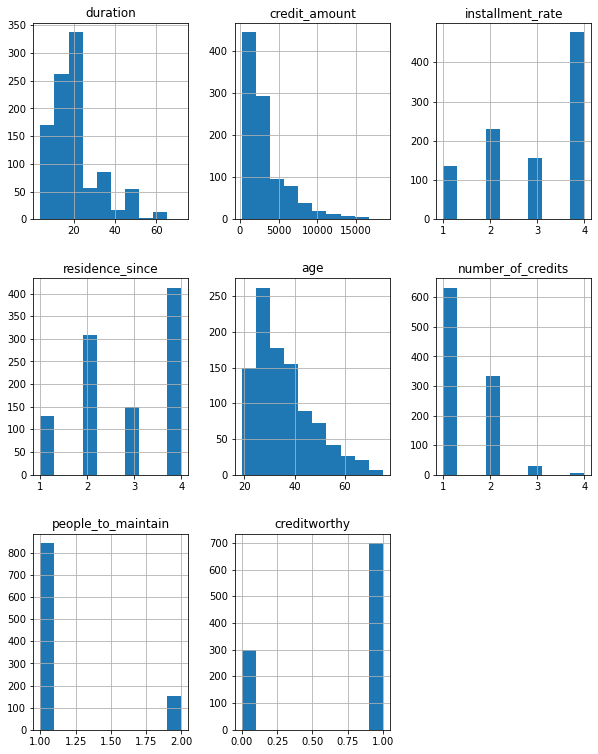

In [78]:
print(df.hist(figsize = (10,13)))


# Categorical

In [80]:
def categorical_numerical_split(df_new):
    categorical = [att for att in df_new.columns if df_new[att].dtype == 'object']
    numerical1 = [att for att in df_new.columns if df_new[att].dtype == 'int64']
    numerical2 = [att for att in df_new.columns if df_new[att].dtype == 'float64']
    numerical = numerical1 + numerical2
    return categorical, numerical

categorical, numerical = categorical_numerical_split(df_new)

print(f'Categorical features:\n{categorical}\n')
print(f'Numerical features:\n{numerical}')


Categorical features:
['account_status', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'personal_status_sex', 'guarantors', 'property', 'other_installment_plans', 'housing', 'job']

Numerical features:
['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'number_of_credits', 'people_to_maintain', 'phone', 'foreign_worker']


In [81]:
# return number of unique elements in the object

df_new[categorical].nunique()


account_status              4
credit_history              5
purpose                    10
savings_account             5
employment_since            5
personal_status_sex         4
guarantors                  3
property                    4
other_installment_plans     3
housing                     3
job                         4
dtype: int64

In [82]:
# Feature representation

print("Unique categorical values:")
for att in df_new.select_dtypes(include=[object]):
    print(att,":", df_new[att].unique())
    

Unique categorical values:
account_status : ['A14' 'A12' 'A13' 'A11']
credit_history : ['A32' 'A33' 'A34' 'A30' 'A31']
purpose : ['A43' 'A46' 'A40' 'A41' 'A42' 'A49' 'A410' 'A45' 'A48' 'A44']
savings_account : ['A63' 'A65' 'A61' 'A64' 'A62']
employment_since : ['A73' 'A74' 'A75' 'A72' 'A71']
personal_status_sex : ['A93' 'A94' 'A92' 'A91']
guarantors : ['A101' 'A102' 'A103']
property : ['A123' 'A124' 'A121' 'A122']
other_installment_plans : ['A143' 'A141' 'A142']
housing : ['A152' 'A153' 'A151']
job : ['A173' 'A174' 'A172' 'A171']


<b><h2>Encodes nominal features to numeric features</h2></b>

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.<br>

return: data frame with all-numeric features

In [83]:
def str_to_num(df):
    # create a new df with categorical features only, encoded as numbers
    categorical, numerical = categorical_numerical_split(df)
    
    enc = LabelEncoder()
    df_encoded = df[categorical].apply(lambda x: enc.fit_transform(x))

    df_encoded_concat = pd.concat([df_encoded, df[numerical]], axis=1)
    
    # Create a dict to decode numeric values; returns a dictionary-like object
    d = defaultdict()
    
    for col_name in df[categorical]:
        # e.g.: account_status_A14 :  3
        for unique_str_val, unique_num_val in zip(df[col_name].unique(), df_encoded[col_name].unique()):
                d[col_name + '_' + unique_str_val] = unique_num_val            
    
    return df_encoded_concat , d


In [84]:
df_new_enc, df_new_enc_dict = str_to_num(df_new)

# Print out new numericaly encoded features
for k,v in df_new_enc_dict.items():
    print(k, ': ', v)
    

account_status_A14 :  3
account_status_A12 :  1
account_status_A13 :  2
account_status_A11 :  0
credit_history_A32 :  2
credit_history_A33 :  3
credit_history_A34 :  4
credit_history_A30 :  0
credit_history_A31 :  1
purpose_A43 :  4
purpose_A46 :  7
purpose_A40 :  0
purpose_A41 :  1
purpose_A42 :  3
purpose_A49 :  9
purpose_A410 :  2
purpose_A45 :  6
purpose_A48 :  8
purpose_A44 :  5
savings_account_A63 :  2
savings_account_A65 :  4
savings_account_A61 :  0
savings_account_A64 :  3
savings_account_A62 :  1
employment_since_A73 :  2
employment_since_A74 :  3
employment_since_A75 :  4
employment_since_A72 :  1
employment_since_A71 :  0
personal_status_sex_A93 :  2
personal_status_sex_A94 :  3
personal_status_sex_A92 :  1
personal_status_sex_A91 :  0
guarantors_A101 :  0
guarantors_A102 :  1
guarantors_A103 :  2
property_A123 :  2
property_A124 :  3
property_A121 :  0
property_A122 :  1
other_installment_plans_A143 :  2
other_installment_plans_A141 :  0
other_installment_plans_A142 :  1
h

For categorical variables where no such ordinal relationship exists, a one-hot encoding can be applied to the integer representation. 

<b> One-Hot Encoding: </b> The integer encoded variable is removed and a new binary variable is added for each unique integer value.

<b>df:</b> dataframe

<b>to_one_hot:</b> list of columns to encode 

<b>return:</b> encoded df

<img src="onehot.jpg">

In [85]:
def to_one_hot(df, verbose=False):
    categorical, numerical = categorical_numerical_split(df)
    
    # 1-hot encoding for the categorical variables
    df_only_one_hot = pd.get_dummies(df[categorical])
    
    if verbose == True:
        print(f'new 1-hot-encoded variables:\n {list(df_only_one_hot.columns)}')
    
    # Concatenate numerical and categorical data
    df_new_onehot = pd.concat([df[numerical], df_only_one_hot], axis = 1)
    
    if verbose == True:
        print(f'Shape: {df_new_onehot.shape}')
        df_new_onehot.head()
    
    return df_new_onehot


In [86]:
# Fatures that shoud be encoded for X_train
df_new_onehot = to_one_hot(df_new, verbose=True)


new 1-hot-encoded variables:
 ['account_status_A11', 'account_status_A12', 'account_status_A13', 'account_status_A14', 'credit_history_A30', 'credit_history_A31', 'credit_history_A32', 'credit_history_A33', 'credit_history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_account_A61', 'savings_account_A62', 'savings_account_A63', 'savings_account_A64', 'savings_account_A65', 'employment_since_A71', 'employment_since_A72', 'employment_since_A73', 'employment_since_A74', 'employment_since_A75', 'personal_status_sex_A91', 'personal_status_sex_A92', 'personal_status_sex_A93', 'personal_status_sex_A94', 'guarantors_A101', 'guarantors_A102', 'guarantors_A103', 'property_A121', 'property_A122', 'property_A123', 'property_A124', 'other_installment_plans_A141', 'other_installment_plans_A142', 'other_installment_plans_A143', 'housing_A151', 'housing_A152', 'housing_A153', 'job_A17

In [87]:
df_new_onehot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1000 non-null   int64  
 1   credit_amount                 1000 non-null   int64  
 2   installment_rate              1000 non-null   int64  
 3   residence_since               1000 non-null   int64  
 4   age                           1000 non-null   int64  
 5   number_of_credits             1000 non-null   int64  
 6   people_to_maintain            1000 non-null   int64  
 7   phone                         1000 non-null   int64  
 8   foreign_worker                1000 non-null   float64
 9   account_status_A11            1000 non-null   uint8  
 10  account_status_A12            1000 non-null   uint8  
 11  account_status_A13            1000 non-null   uint8  
 12  account_status_A14            1000 non-null   uint8  
 13  cred

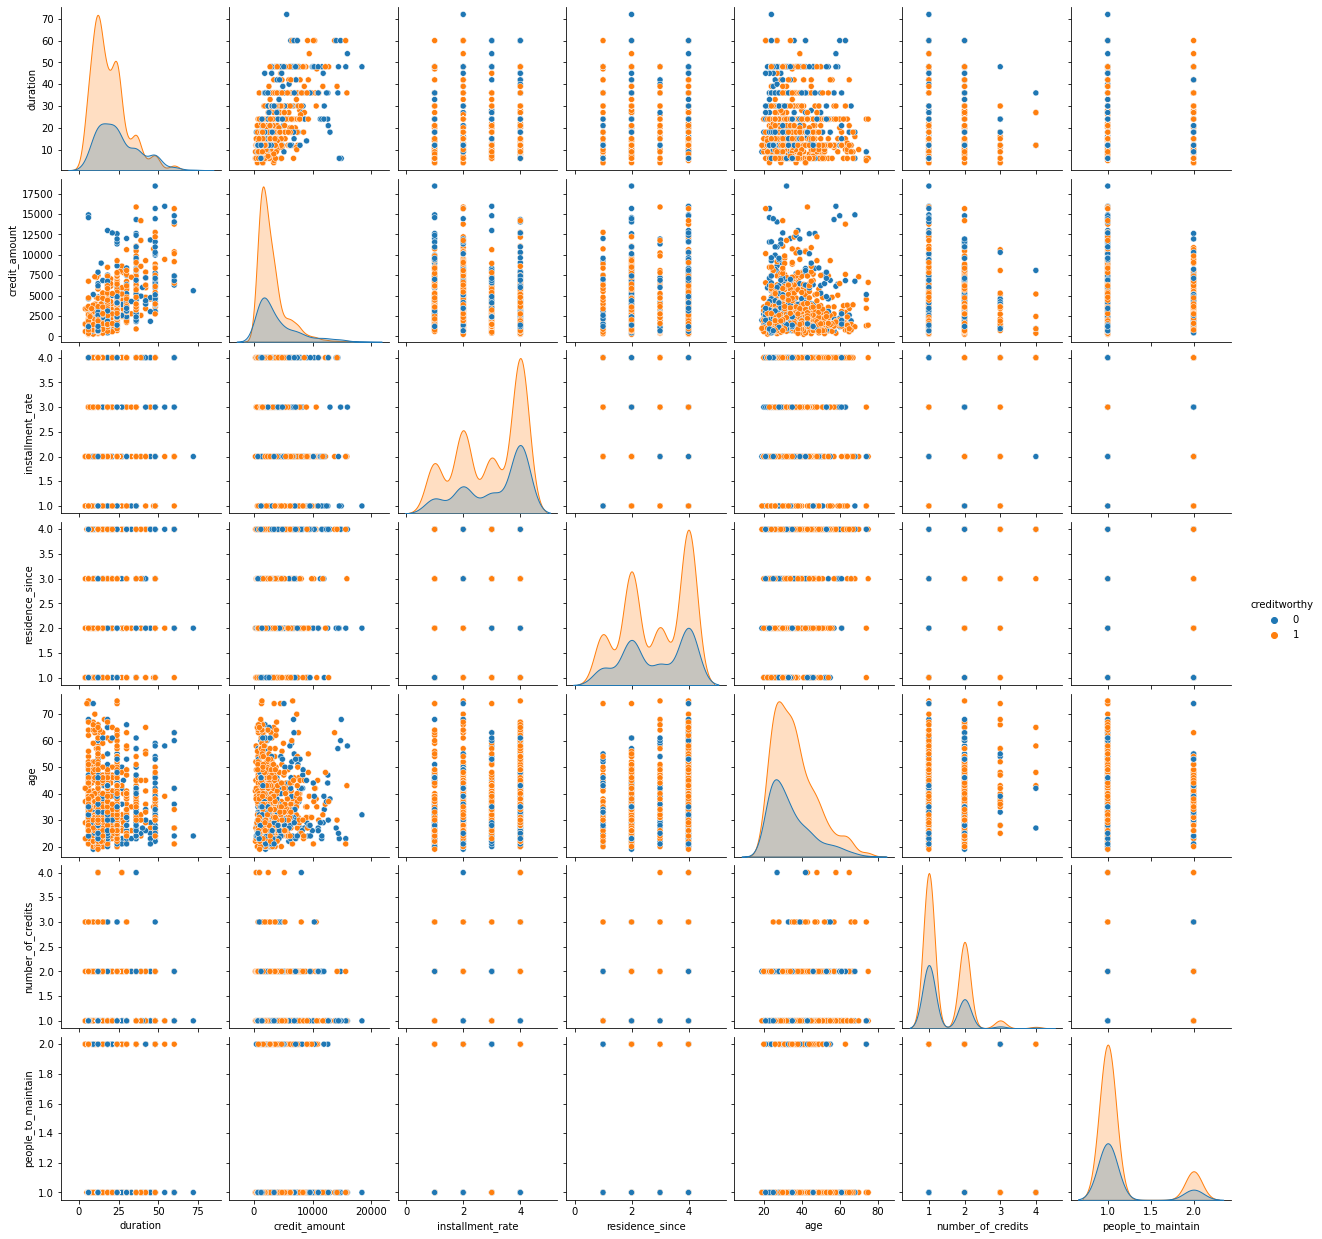

In [89]:
sns.pairplot(df, hue='creditworthy')


# Evalution Function

In [25]:
def evaluation(clf, X, Y):
    print(f'Accuracy')
    acc = cross_val_score(clf, X, Y, scoring="accuracy", cv = 5)
    print(acc)
    print("Accuracy Score (Mean): ", acc.mean())
    print("Standard Error: ", acc.std())

    print(f'\nF1 Score')
    f1_score = cross_val_score(clf, X, Y, scoring="f1", cv = 5)
    print(f1_score)
    print("F1 Score (Mean): ", f1_score.mean())
    print("Standard Error: ", f1_score.std())
    
    print(f'\nPrecision')
    pre = cross_val_score(clf, X, Y, scoring="precision", cv = 5)
    print(pre)
    print("Precision (Mean): ", pre.mean())
    print("Standard Error: ", pre.std())
    
    print(f'\nRecall')
    rec = cross_val_score(clf, X, Y, scoring="recall", cv = 5)
    print(rec)
    print("Recall (Mean): ", rec.mean())
    print("Standard Error: ", rec.std())


# Random Forest

<b>Entropy:</b> $$H_{L}(x_{j}) = -\sum \limits _{v = 1}^{k} P(y=v) * \log_2 P(y=v)$$
<b>Information Gain:</b> $$IG_{L}(x_{j}) = H_{L}(y) - \sum \limits _{v = 1}^{k} P_{L}(x_{j}=v) * H_{L} (y | x_{j} = v)$$
<b>Information Gain Ratio:</b> $$ GR_{L} (x_{j}) = \frac{IG_{L}(x_{j})}{H_{L}(x_{j})} $$

In [26]:
def hyperParameterTuning(features, labels):
    params = {
        "n_estimators": [30, 50, 70, 100],
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20, 30, 40, 50],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = RandomForestClassifier()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_

label_enc = label_onehot = label


# Normal Encoding 

In [27]:
hyperParameterTuning(df_new_enc, label_enc)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 30, 'random_state': 20}

In [28]:
clf_enc = RandomForestClassifier(criterion='gini', max_depth=30, n_estimators=30, random_state=20)


In [29]:
evaluation(clf_enc, df_new_enc, label_enc)


Accuracy
[0.815 0.73  0.765 0.785 0.78 ]
Accuracy Score (Mean):  0.775
Standard Error:  0.02774887385102321

F1 Score
[0.87457627 0.82       0.84488449 0.84912281 0.84827586]
F1 Score (Mean):  0.847371885744359
Standard Error:  0.017316863228019383

Precision
[0.83225806 0.76875    0.78527607 0.83448276 0.82      ]
Precision (Mean):  0.8081533793512902
Standard Error:  0.026422005609884214

Recall
[0.92142857 0.87857143 0.91428571 0.86428571 0.87857143]
Recall (Mean):  0.8914285714285715
Standard Error:  0.022314999074018987


# One Hot Encoding

In [30]:
hyperParameterTuning(df_new_onehot, label_onehot)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 70, 'random_state': 40}

In [31]:
clf_onehot = RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=70, random_state=40)


In [32]:
evaluation(clf_onehot, df_new_onehot, label_onehot)


Accuracy
[0.785 0.74  0.81  0.76  0.795]
Accuracy Score (Mean):  0.7779999999999999
Standard Error:  0.025019992006393627

F1 Score
[0.85808581 0.82894737 0.87662338 0.83892617 0.86101695]
F1 Score (Mean):  0.8527199354548948
Standard Error:  0.01687844966310491

Precision
[0.79754601 0.76829268 0.80357143 0.79113924 0.81935484]
Precision (Mean):  0.7959808405968406
Standard Error:  0.0167121856293004

Recall
[0.92857143 0.9        0.96428571 0.89285714 0.90714286]
Recall (Mean):  0.9185714285714287
Standard Error:  0.025793528693239694


# Other Classifier

<h3>Hyperparameter Tuning in Support Vector Machine</h3>

In [33]:
def hyperParameterTuning_SVC(features, labels):
    params = {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [1, 3, 5],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = SVC()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_


<h3>Hyperparameter Tuning in Logistic Regression</h3>

In [34]:
def hyperParameterTuning_LogisticRegression(features, labels):
    params = {
        "penalty": ["l1", "l2", "none"],
        "C": [1, 3, 5, 7, 10],
        "max_iter": [30, 50, 60, 80, 100],
        "solver": ["lbfgs", "liblinear", "saga"],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = LogisticRegression()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_


<h3>Hyperparameter Tuning in Decision Trees</h3>

In [35]:
def hyperParameterTuning_DecisionTree(features, labels):
    params = {
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_leaf": [3, 4, 5],
        "min_samples_split": [8, 10, 12],
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20, 30, 40, 50],
        "random_state": [10, 20, 30, 40, 50]
    }
    
    rf_model = DecisionTreeClassifier()
    
    gsearch = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1)
    
    gsearch.fit(features,labels)
    
    return gsearch.best_params_


# ROC Curve


## Normal Encoding

In [60]:
def roc_curve_normal(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    
    clf_random = RandomForestClassifier(criterion='gini',  max_depth=30, n_estimators=30, random_state=20)
    clf_random.fit(X_train, y_train)
    #Curve Point
    #y_score1 = clf_random.predict_proba(X_test)[:,1]
    #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    #print(false_positive_rate1, true_positive_rate1, threshold1)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    
    clf_svm = SVC(random_state = 10, kernel='linear', C=1)
    clf_svm.fit(X_train, y_train)
    
    clf_log_reg = LogisticRegression(C=1, max_iter=30, penalty='l1', random_state=40, solver='liblinear')
    clf_log_reg.fit(X_train, y_train)
    
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                                      min_samples_leaf = 5, min_samples_split=8, random_state=30 )
    clf_tree.fit(X_train, y_train)
    
    ax = plt.gca()
    
    clf_log_reg_disp = plot_roc_curve(clf_log_reg, X_test, y_test, ax=ax, alpha=0.8)
    clf_tree_disp = plot_roc_curve(clf_tree, X_test, y_test, ax=ax, alpha=0.8)
    clf_svm_disp = plot_roc_curve(clf_svm, X_test, y_test, ax=ax, alpha=0.8)
    clf_enc_disp = plot_roc_curve(clf_random, X_test, y_test, ax=ax, alpha=0.8)
    
    ax.figure.set_size_inches(20, 12)
    plt.show()


## One Hot Encoding

In [61]:
def roc_curve_onehot(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=100)
    
    clf_random = RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=70, random_state=40)
    clf_random.fit(X_train, y_train)
    #Curve Point
    #y_score1 = clf_random.predict_proba(X_test)[:,1]
    #false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    #print(false_positive_rate1, true_positive_rate1, threshold1)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
    
    clf_svm = SVC(random_state = 10, kernel='linear', C=1)
    clf_svm.fit(X_train, y_train)
    
    clf_log_reg = LogisticRegression(C=5, max_iter=80, penalty='l2', random_state=10, solver='lbfgs')
    clf_log_reg.fit(X_train, y_train)
    
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2', min_samples_leaf=3,
                                  min_samples_split=10, random_state=40)
    clf_tree.fit(X_train, y_train)
    
    ax = plt.gca()
    
    clf_log_reg_disp = plot_roc_curve(clf_log_reg, X_test, y_test, ax=ax, alpha=0.8)
    clf_tree_disp = plot_roc_curve(clf_tree, X_test, y_test, ax=ax, alpha=0.8)
    clf_svm_disp = plot_roc_curve(clf_svm, X_test, y_test, ax=ax, alpha=0.8)
    clf_enc_disp = plot_roc_curve(clf_random, X_test, y_test, ax=ax, alpha=0.8)
    
    ax.figure.set_size_inches(20, 12)
    plt.show()
    

# Normal Encoding
## Support Vector Machine

In [38]:
hyperParameterTuning_SVC(df_new_enc, label_enc)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'C': 1, 'kernel': 'linear', 'random_state': 10}

In [39]:
#%%time
clf_svm = SVC(random_state = 10, kernel='linear', C=1)


In [40]:
evaluation(clf_svm, df_new_enc, label_enc)


Accuracy
[0.755 0.8   0.77  0.695 0.78 ]
Accuracy Score (Mean):  0.76
Standard Error:  0.035637059362410954

F1 Score
[0.82926829 0.86842105 0.84868421 0.78596491 0.84397163]
F1 Score (Mean):  0.8352620198654396
Standard Error:  0.027646567843334052

Precision
[0.80952381 0.80487805 0.78658537 0.77241379 0.83802817]
Precision (Mean):  0.8022858372550978
Standard Error:  0.022250689457857187

Recall
[0.85       0.94285714 0.92142857 0.8        0.85      ]
Recall (Mean):  0.8728571428571428
Standard Error:  0.05217709247928476


## Logistic Regression

In [41]:
hyperParameterTuning_LogisticRegression(df_new_enc, label_enc)


Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


{'C': 1,
 'max_iter': 30,
 'penalty': 'l1',
 'random_state': 40,
 'solver': 'liblinear'}

In [42]:
clf_log_reg = LogisticRegression(C=1, max_iter=30, penalty='l1', random_state=40, solver='liblinear')


In [43]:
evaluation(clf_log_reg, df_new_enc, label_enc)


Accuracy
[0.76  0.77  0.76  0.74  0.755]
Accuracy Score (Mean):  0.757
Standard Error:  0.00979795897113272

F1 Score
[0.83783784 0.85064935 0.84210526 0.82191781 0.83044983]
F1 Score (Mean):  0.8365920173707762
Standard Error:  0.009824616873481289

Precision
[0.79487179 0.7797619  0.7804878  0.78947368 0.80536913]
Precision (Mean):  0.7899928632478106
Standard Error:  0.009544859031817223

Recall
[0.88571429 0.93571429 0.91428571 0.85714286 0.85714286]
Recall (Mean):  0.89
Standard Error:  0.0311677488989592


## Decision Tree

In [44]:
hyperParameterTuning_DecisionTree(df_new_enc, label_enc)


Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'random_state': 30}

In [45]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                                      min_samples_leaf = 5, min_samples_split=8, random_state=30 )


In [46]:
evaluation(clf_tree, df_new_enc, label_enc)


Accuracy
[0.71  0.7   0.78  0.715 0.72 ]
Accuracy Score (Mean):  0.725
Standard Error:  0.028284271247461926

F1 Score
[0.79432624 0.78723404 0.85234899 0.8        0.8       ]
F1 Score (Mean):  0.8067818553953068
Standard Error:  0.02326203127205083

Precision
[0.78873239 0.78169014 0.80379747 0.7862069  0.8       ]
Precision (Mean):  0.7920853800234843
Standard Error:  0.008410401902010471

Recall
[0.8        0.79285714 0.90714286 0.81428571 0.8       ]
Recall (Mean):  0.8228571428571427
Standard Error:  0.042714046822074435


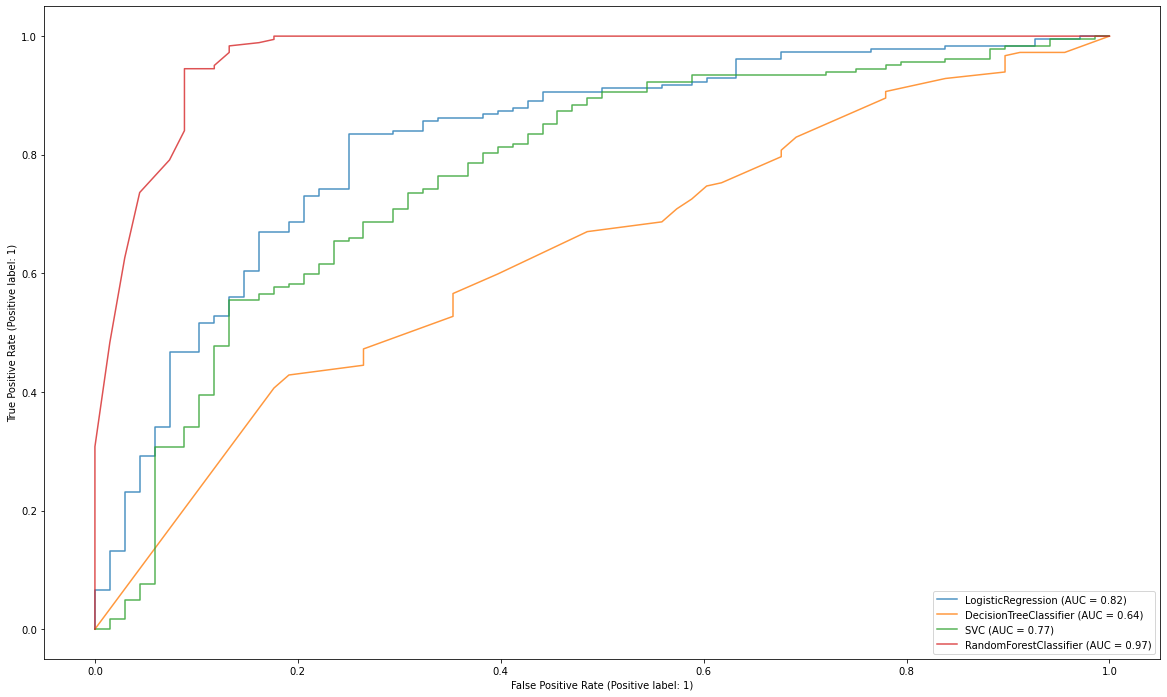

In [62]:
roc_curve_normal(df_new_enc, label_enc) #test_size = 0.25


# One Hot Encoding
## Support Vector Machine

In [48]:
hyperParameterTuning_SVC(df_new_onehot, label_onehot)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'C': 1, 'kernel': 'linear', 'random_state': 10}

In [49]:
clf_svm = SVC(random_state = 10, kernel='linear', C=1)


In [50]:
evaluation(clf_svm, df_new_onehot, label_onehot)


Accuracy
[0.74  0.695 0.77  0.71  0.735]
Accuracy Score (Mean):  0.73
Standard Error:  0.02588435821108959

F1 Score
[0.82312925 0.79734219 0.84768212 0.80405405 0.81911263]
F1 Score (Mean):  0.8182640491274821
Standard Error:  0.0174897751043038

Precision
[0.78571429 0.74534161 0.79012346 0.76282051 0.78431373]
Precision (Mean):  0.77366271914439
Standard Error:  0.017025148809997687

Recall
[0.86428571 0.85714286 0.91428571 0.85       0.85714286]
Recall (Mean):  0.8685714285714285
Standard Error:  0.023299294900428702


## Logistic Regression

In [51]:
hyperParameterTuning_LogisticRegression(df_new_onehot, label_onehot)


Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


{'C': 5,
 'max_iter': 80,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs'}

In [52]:
clf_log_reg = LogisticRegression(C=5, max_iter=80, penalty='l2', random_state=10, solver='lbfgs')


In [53]:
evaluation(clf_log_reg, df_new_onehot, label_onehot)


Accuracy
[0.75  0.75  0.805 0.735 0.77 ]
Accuracy Score (Mean):  0.762
Standard Error:  0.024207436873820428

F1 Score
[0.82517483 0.83443709 0.87213115 0.81786942 0.84027778]
F1 Score (Mean):  0.8379780504787725
Standard Error:  0.01872186411604276

Precision
[0.80821918 0.77777778 0.80606061 0.78807947 0.81756757]
Precision (Mean):  0.7995409199373638
Standard Error:  0.014476033179902764

Recall
[0.84285714 0.9        0.95       0.85       0.86428571]
Recall (Mean):  0.8814285714285715
Standard Error:  0.039538150008851546


## Decision Tree

In [54]:
hyperParameterTuning_DecisionTree(df_new_onehot, label_onehot)


Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'random_state': 40}

In [55]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2', min_samples_leaf=3,
                                  min_samples_split=10, random_state=40)


In [56]:
evaluation(clf_tree, df_new_onehot, label_onehot)


Accuracy
[0.745 0.74  0.745 0.72  0.67 ]
Accuracy Score (Mean):  0.724
Standard Error:  0.028530685235374196

F1 Score
[0.82711864 0.82312925 0.83495146 0.80141844 0.76428571]
F1 Score (Mean):  0.8101807012162366
Standard Error:  0.025500102853069626

Precision
[0.78709677 0.78571429 0.76331361 0.79577465 0.76428571]
Precision (Mean):  0.7792370063096656
Standard Error:  0.013071498680756547

Recall
[0.87142857 0.86428571 0.92142857 0.80714286 0.76428571]
Recall (Mean):  0.8457142857142858
Standard Error:  0.05451081150953975


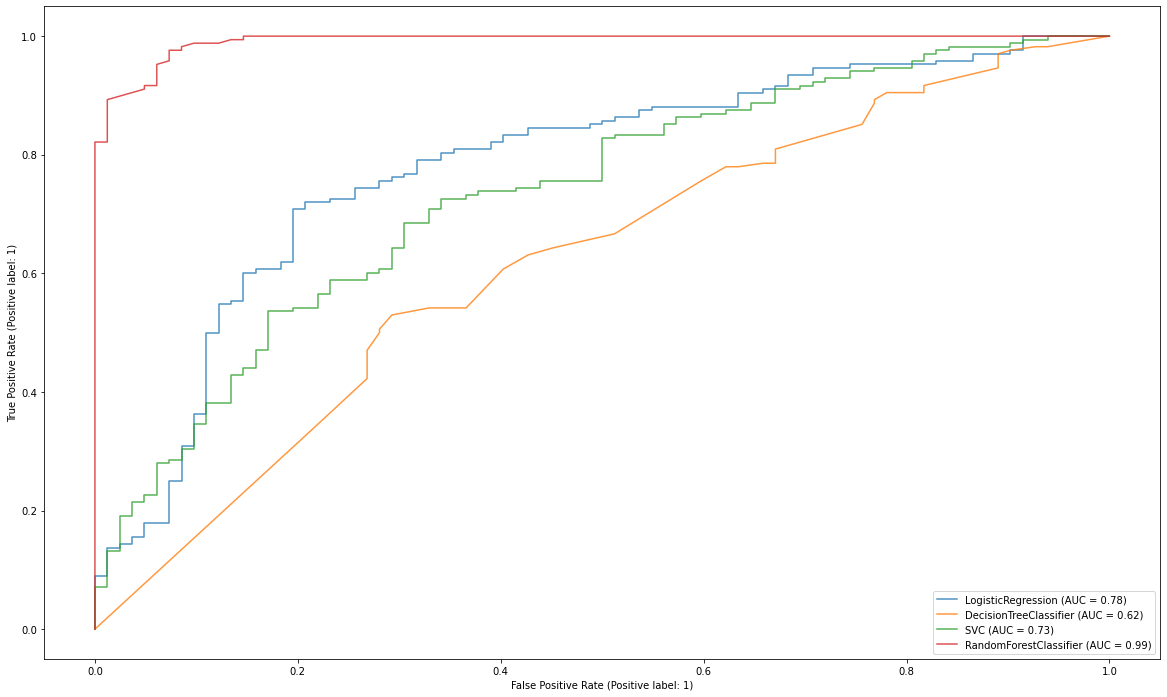

In [63]:
roc_curve_onehot(df_new_onehot, label_onehot) #test_size = 0.25
